# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

#### Data 1

* Importing Twitter_archive_enhanced.csv as df_arc_twitter. The file has been provided in the classroom, downloaded manually and read into dataframe.


In [1]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
#loading Libaries and packages.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import requests

import os

import json

import time

import datetime

import re

from functools import reduce

In [3]:
#Loading the twitter archive to a data frame manually.

df_arc_twitter = pd.read_csv("C:\\Users\\k2k\\Desktop\\udacity alx projects\\PROJECT 2\\twitter-archive-enhanced.csv")

df_arc_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Data 2
* Using the Requests library to download the tweet image prediction (image_predictions.tsv) as image_prediction



In [4]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
image_predictions=requests.get(url)
with open("image-predictions.tsv" , 'w') as image_file :
    image_file.write(image_predictions.text)
df_image_predictions= pd.read_csv("image-predictions.tsv" , sep="\t")
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Data 3

* loading the Twitter API (tweet_json.txt) into data frame

In [6]:
#loading the scrapped twitter data, a json file

with open ("C:\\Users\\k2k\\Desktop\\udacity alx projects\\PROJECT 2\\Data Wrangling Submission\\tweet-json.txt") as tweets:
 # looping through each tweet   
    data_tweet=[]
    for line in tweets:
        tweet= json.loads(line)
        data_tweet.append([tweet["id"],tweet["retweet_count"],tweet["favorite_count"]])

In [7]:
#create a dataframe for the tweet in the json

df_tweet= pd.DataFrame(data_tweet,columns=["tweet_id","retweet_count" ,"favorite_count"]) 
df_tweet.to_csv("addtional_twitter_data.csv", sep=",",index=None)
df_tweet = pd.read_csv("addtional_twitter_data.csv",sep=",")
df_tweet.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual  and Programatic Assessment 




### checking the df_arc_twitter.


In [8]:
df_arc_twitter


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_arc_twitter.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1711,680497766108381184,NaN,NaN,2015-12-25 21:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Percy. He's a Latvian Yuletide Heineken. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680497766...,12,10,Percy,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
1370,702321140488925184,NaN,NaN,2016-02-24 02:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this picture as much as I did. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702321140...,12,10,None,None,None,None,None
2033,671744970634719232,NaN,NaN,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,None,None,None
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,None,None,None,None
737,780858289093574656,NaN,NaN,2016-09-27 19:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dash. He's very stylish, but also incr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780858289...,10,10,Dash,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,None,None,None,None
1246,711694788429553666,NaN,NaN,2016-03-20 23:23:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh. My. God. 13/10 magical af https://t.co/Ezu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None


In [10]:
# programatically
df_arc_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# programatically

df_arc_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Twitter_ archive findings
1. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls' have      missing values.
2. 'timestamp' datatype is in object.
3. 'text' datatype  is object
4. 'expanded_urls' datatype is object
5. The data contains four dog groups
6. missing data in in_reply_to_status_id, in_reply_to_user_id.
7. Data contains retweet data, meanwhile we have to deal only will tweet and not retweet contains umwanted column.
8. In 'name' some values are not valid such as a, An etc.
9. 'name' contains 'none' as value instead as null.
10. huge Values in Numerator and denominator as compared to the 75% percentile.
    

## Assement df_image_predictions



In [12]:
#visually

df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### findings

1. In 'p1', 'p2', 'p2' 'column', 'Space' are replaced with "_" 
2. Dog name start with small letter.
3. The data contains 3 prediction of dog.
4. The data contain unwanted column.

In [13]:
#programatically

df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### findings 

1. 'tweet_id' is int datatype.
2. Data has no missing value.
3. Data contains uwanted column.


###  Assesing df_tweet

In [15]:
# visually
df_tweet.sample(10)


,tweet_id,retweet_count,favorite_count
882,760190180481531904,2079,6334
1505,691675652215414786,577,2116
1837,675891555769696257,976,2297
1498,692158366030913536,896,2369
934,753375668877008896,2655,8411
722,782969140009107456,8521,26949
1855,675517828909424640,507,1414
1723,680070545539371008,994,2818
1976,672984142909456390,593,1338
465,817171292965273600,2326,9690


In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### findings

1. df_tweet.tweet_id datatype is int 64.
2. no missing Value

In [17]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### findings

1. There are high values in 'retweet_count as compare to 75% percentile.
2. the minmum Value in 'retweet_count and 'favorite_count' is '0',  that's no retweet and likes.

In [18]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Quality issues

1. df_arc_twitter.name contains some invalid values such as 'a', 'an' 'None' etc that start with small letter.


2. 'in_reply_to_status_id', 'in_reply_to_user_id' contains retweet data and they are not needed.


3. 'timestamp' in df_arc_twitter datatype is object instead of datetime datatype.


4. df_arc_twitter contains retweet data, meanwhile we have to deal only will tweet and not retweet.


5. In df_images_predictions, some Dog names start with small letter.


6. In df_images_predictions, 2nd and 3rd prediction are unwanted because 1st predition will be preffered  to 2nd and 3rd, the rename to breed.


7. In df_images_predictions, tweet_id datatype is int64 instead of object Datatype.


8. In df_arc_twitter, some of the  ratings denominator are not 10, in which the Ratings denominator should be 10.


9. In df_arc_twitter, "none" is recognised value instead as null value.

### Tidiness issues
1. In df_arc_twitter, the timestamp contains date and time in column.


2. In df_arc_twitter, the dog group are in  four colunns ('doggo', ' flopper', 'pupper', puppo').

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data

df_arc_twitter_copy = df_arc_twitter.copy()

df_tweet_copy = df_tweet.copy()

df_image_preditions_copy = df_image_predictions.copy()




### Issue #1:

#### Define: df_arc_twitter.name contains some invalid values i.e small lower case such as 'a', 'an' , 'None' etc

In [20]:
df_arc_twitter_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Code

In [21]:
#printing all th dogs name

print(sorted(df_arc_twitter.name))

['Abby', 'Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albert', 'Albus', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfie', 'Alfie', 'Alfie', 'Alfie', 'Alfy', 'Alice', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Archie', 'Archie', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnie', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Aspen', 'Astrid', 'Astrid', 'Atlas', 'Atlas', 'Atticus', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Ava', 'Axel', 'Axel', 'Bailey', 'Bailey', 'Bailey', 'Bailey', 'Bailey', 'Bailey', 'Bailey', 'Baloo', 'Baloo', 'Balto', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Bear', 'Bear', 'Bear', 'Beau', 'Beau', 'Beau', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bell', 'Bella', 'Bella', 'Bella

In [22]:
 #replacing invalid name of dogs with actual name in "text" and the rest with none
    
    
    #Save locations where 'name' column is lowercase, lowercase and 'text' column contains 'named' and lowercase and 'text'
# column contains the words 'name is'
named_to_replace = df_arc_twitter_copy.loc[(df_arc_twitter_copy['name'].str.islower()) & (df_arc_twitter_copy['text'].str.contains('named'))]
name_is_to_replace = df_arc_twitter_copy.loc[(df_arc_twitter_copy['name'].str.islower()) & (df_arc_twitter_copy['text'].str.contains('name is'))]
not_named_to_replace = df_arc_twitter_copy.loc[(df_arc_twitter_copy['name'].str.islower())]

# Save these locations as lists
named_to_replace_list = named_to_replace['text'].tolist()
name_is_to_replace_list = name_is_to_replace['text'].tolist()
not_named_to_replace_list = not_named_to_replace['text'].tolist()

# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named'
for entry in named_to_replace_list:
    mask = df_arc_twitter_copy.text == entry
    name_column = 'name'
    df_arc_twitter_copy.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'    
for entry in name_is_to_replace_list:
    mask = df_arc_twitter_copy.text == entry
    name_column = 'name'
    df_arc_twitter_copy.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in not_named_to_replace_list:
    mask = df_arc_twitter_copy.text == entry
    name_column = 'name'
    df_arc_twitter_copy.loc[mask, name_column] = "None"

#### Test

In [23]:
#printing all the dog name

df_arc_twitter_copy.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2356, dtype: object

### Issue #2: invalid Data

#### Define

Dropping row with with In-reply_status, in_reply_sataus contains retweet data

#### Code

In [24]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
df_arc_twitter_copy = df_arc_twitter_copy[df_arc_twitter_copy.in_reply_to_status_id.isna()]


#### Test

In [26]:
df_arc_twitter_copy.in_reply_to_status_id.sum()

0.0

### issue 3: incorrect datatype

### Define


timestamp has object datatype instead of datatime datatype



In [27]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [28]:
df_arc_twitter_copy['timestamp'] = pd.to_datetime(df_arc_twitter_copy.timestamp)

C:\Users\k2k\AppData\Local\Temp\ipykernel_11088\1270634860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arc_twitter_copy['timestamp'] = pd.to_datetime(df_arc_twitter_copy.timestamp)


### Test

In [29]:
df_arc_twitter_copy['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2278 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2278 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 35.6 KB


### Issue 4: Invalid Data

### Define: 
    df_arc_twitter_copy contains retweet data that is not required for the analysis as we are deal with only retweet

In [30]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2278 non-null   datetime64[ns, UTC]
 4   source                      2278 non-null   object             
 5   text                        2278 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2274 non-null   object             
 10  rating_numerator            2278 non-null   int64           

In [31]:
df_arc_twitter_copy = df_arc_twitter_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [32]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2278 non-null   int64              
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              2278 non-null   datetime64[ns, UTC]
 4   source                 2278 non-null   object             
 5   text                   2278 non-null   object             
 6   expanded_urls          2274 non-null   object             
 7   rating_numerator       2278 non-null   int64              
 8   rating_denominator     2278 non-null   int64              
 9   name                   2278 non-null   object             
 10  doggo                  2278 non-null   object             
 11  floofer                2278 non-null   object           

Note no more retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' column

### Issue 5


### Define

extracting Dog Breed  and confidence level

In [33]:
df_image_preditions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Extracting  the predicted name and confidence_Level


In [34]:
# creating a list for predicted_name and confidence_level
prediction_name = []
confidence_level = []



since the preffered prediction start from 1 to 3 , we will creact a function called predict

In [35]:
# creating a function predict and appending the values to the list
def predict(df_image_preditions_copy):
    if df_image_preditions_copy['p1_dog'] == True:
        prediction_name.append(df_image_preditions_copy['p1'])
        confidence_level.append(df_image_preditions_copy['p1_conf'])
    elif df_image_preditions_copy['p2_dog'] == True:
        prediction_name.append(df_image_preditions_copy['p2'])
        confidence_level.append(df_image_preditions_copy['p2_conf'])
    elif df_image_preditions_copy['p3_dog'] == True:
        prediction_name.append(df_image_preditions_copy['p3'])
        confidence_level.append(df_image_preditions_copy['p3_conf'])
    else:
        prediction_name.append('NaN')
        confidence_level.append(0)



In [36]:
## adding the predictionName and confidence_level to the df_image_preditions_copy

df_image_preditions_copy.apply(predict, axis = 1)
df_image_preditions_copy['breed'] = prediction_name
df_image_preditions_copy['confidence_level'] = confidence_level


In [37]:
df_image_preditions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed',
       'confidence_level'],
      dtype='object')

In [38]:
#dropping the three prediction and img_num


df_image_preditions_copy = df_image_preditions_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis = 1)

### Test

In [39]:
df_image_preditions_copy.head()

,tweet_id,jpg_url,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Issue 6: Inconsistent data

### Define : some of the dog breed is in small letter, i need to capitalized it.

In [40]:
print(df_image_preditions_copy.breed)

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       NaN
Name: breed, Length: 2075, dtype: object


In [41]:
df_image_preditions_copy['breed'] = df_image_preditions_copy.breed.str.capitalize()

In [42]:
df_image_preditions_copy.breed

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       Nan
Name: breed, Length: 2075, dtype: object

note 'redbone' change to 'Redbone'

### Issue 7: Wrong Datatype

### Define:

tweet_id has int64 datatype instead of object.


In [43]:
df_image_preditions_copy.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype
--------------  -----
2075 non-null   int64
dtypes: int64(1)
memory usage: 16.3 KB


In [44]:
df_image_preditions_copy.tweet_id = df_image_preditions_copy.tweet_id.astype(object)

### Test

In [45]:
df_image_preditions_copy.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Issuse 8; Inconsistent Data


### Define : The denominator column is to be 10 based on the resource, but some are not and they need to be change to 10

In [46]:
df_arc_twitter_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator
count,2.278000e+03,0.0,0.0,2278.000000,2278.000000
mean,7.424486e+17,NaN,NaN,12.179104,10.413521
std,6.829145e+16,NaN,NaN,38.752738,6.376645
min,6.660209e+17,NaN,NaN,0.000000,2.000000
25%,6.783975e+17,NaN,NaN,10.000000,10.000000
50%,7.196279e+17,NaN,NaN,11.000000,10.000000
75%,7.986857e+17,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,1776.000000,170.000000


In [47]:
### Settting the rating_denominator column as 10

df_arc_twitter_copy.rating_denominator = 10


In [48]:
df_arc_twitter_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator
count,2.278000e+03,0.0,0.0,2278.000000,2278.0
mean,7.424486e+17,NaN,NaN,12.179104,10.0
std,6.829145e+16,NaN,NaN,38.752738,0.0
min,6.660209e+17,NaN,NaN,0.000000,10.0
25%,6.783975e+17,NaN,NaN,10.000000,10.0
50%,7.196279e+17,NaN,NaN,11.000000,10.0
75%,7.986857e+17,NaN,NaN,12.000000,10.0
max,8.924206e+17,NaN,NaN,1776.000000,10.0


#### Issue 9;  

#### Define; None is recognise as Value instead of Nan, so i will replace None with Nan

In [49]:
# replace 'None' in puppo, doggo, floofer and pupper

df_arc_twitter_copy['doggo'] = df_arc_twitter_copy['doggo'].replace('None',np.NaN,)
df_arc_twitter_copy['floofer'] = df_arc_twitter_copy['floofer'].replace('None',np.NaN,)
df_arc_twitter_copy['pupper'] = df_arc_twitter_copy['pupper'].replace('None',np.NaN,)
df_arc_twitter_copy['puppo'] = df_arc_twitter_copy['puppo'].replace('None',np.NaN,)


### Test

In [50]:
df_arc_twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue 10

#### Define; some of the data in text are retweet. string that start with "RT" are dropped

In [51]:
### dropping  string that start with "RT" in text column
df_arc_twitter_copy = df_arc_twitter_copy[~df_arc_twitter_copy.text.str.contains('^RT', regex= True, na=False)]


### Test

In [52]:
df_arc_twitter_copy[df_arc_twitter_copy.text.str.contains('^RT', regex= True, na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidyness

### Issue 1;

#### Define; The Dog stage is four colums, i need to concatenante to form one columns named "stage"

In [53]:
df_arc_twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [54]:
## using concat to combine the four columns to stage


df_arc_twitter_copy['stage'] = df_arc_twitter_copy['doggo'].str.cat(df_arc_twitter_copy['floofer']).str.cat(df_arc_twitter_copy['pupper']).str.cat(df_arc_twitter_copy['puppo'])




In [55]:
# drop the four old colomns
df_arc_twitter_copy = df_arc_twitter_copy.drop(['doggo','floofer','pupper','puppo'], axis = 1)


### Test 

In [56]:
df_arc_twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Issue 2;

#### Define; The source column in df_arc_twitter_copy count some text and source of the tweet, so i will update the colum manually by replacing it the source.

In [57]:
df_arc_twitter_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1963
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
## using replace function

df_arc_twitter_copy['source'] = df_arc_twitter_copy['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
df_arc_twitter_copy['source'] = df_arc_twitter_copy['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_arc_twitter_copy['source'] = df_arc_twitter_copy['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_arc_twitter_copy['source'] = df_arc_twitter_copy['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweetdeck')

### Test

In [59]:
df_arc_twitter_copy.source.value_counts()

Twitter for iphone     1963
Vine - Make a Scene      90
Twitter Web Client       31
Tweetdeck                11
Name: source, dtype: int64

### Issue 3

#### Define; split datetime column into date and time

In [60]:
df_arc_twitter_copy['date'] = pd.to_datetime(df_arc_twitter_copy['timestamp']).dt.date

df_arc_twitter_copy['time'] = pd.to_datetime(df_arc_twitter_copy['timestamp']).dt.time

## drop the timestamp

df_arc_twitter_copy.drop(df_arc_twitter_copy.columns[[3]], axis = 1, inplace = True)

#### Test

In [61]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2095 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   source                 2095 non-null   object 
 4   text                   2095 non-null   object 
 5   expanded_urls          2092 non-null   object 
 6   rating_numerator       2095 non-null   int64  
 7   rating_denominator     2095 non-null   int64  
 8   name                   2095 non-null   object 
 9   stage                  0 non-null      object 
 10  date                   2095 non-null   object 
 11  time                   2095 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 212.8+ KB


### Issue 4

### Define; calculate ratings by dividing rating_numerator by rating_denominator

In [62]:
##calculate ratings by dividing rating_numerator by rating_denominator

df_arc_twitter_copy['ratings'] = df_arc_twitter_copy.rating_numerator / df_arc_twitter_copy.rating_denominator

##drop rating_numerator and rating_denominator
df_arc_twitter_copy.drop(df_arc_twitter_copy.columns[[6,7]], axis = 1, inplace = True)


### Test

In [63]:
df_arc_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2095 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   source                 2095 non-null   object 
 4   text                   2095 non-null   object 
 5   expanded_urls          2092 non-null   object 
 6   name                   2095 non-null   object 
 7   stage                  0 non-null      object 
 8   date                   2095 non-null   object 
 9   time                   2095 non-null   object 
 10  ratings                2095 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 196.4+ KB


### Merging 

merging all the three dataset in to twitter_archive_master dataframe

In [64]:

#define list of DataFrames
dfs = [df_arc_twitter_copy, df_tweet_copy, df_image_preditions_copy]

#merge all DataFrames into one
twitter_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'], how='inner'), dfs)


In [65]:
## checking the master dataframe column


twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1970 non-null   object 
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   source                 1970 non-null   object 
 4   text                   1970 non-null   object 
 5   expanded_urls          1970 non-null   object 
 6   name                   1970 non-null   object 
 7   stage                  0 non-null      object 
 8   date                   1970 non-null   object 
 9   time                   1970 non-null   object 
 10  ratings                1970 non-null   float64
 11  retweet_count          1970 non-null   int64  
 12  favorite_count         1970 non-null   int64  
 13  jpg_url                1970 non-null   object 
 14  breed                  1970 non-null   object 
 15  conf

In [66]:
#### drop null Value column 'in_reply_to_status_id', 'in_reply_to_user_id' and 'stage'

twitter_archive_master.drop(twitter_archive_master.columns[[1,2,7]], axis = 1, inplace = True)


In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1970 non-null   object 
 1   source            1970 non-null   object 
 2   text              1970 non-null   object 
 3   expanded_urls     1970 non-null   object 
 4   name              1970 non-null   object 
 5   date              1970 non-null   object 
 6   time              1970 non-null   object 
 7   ratings           1970 non-null   float64
 8   retweet_count     1970 non-null   int64  
 9   favorite_count    1970 non-null   int64  
 10  jpg_url           1970 non-null   object 
 11  breed             1970 non-null   object 
 12  confidence_level  1970 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 215.5+ KB


#### Final test

In [68]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1970 non-null   object 
 1   source            1970 non-null   object 
 2   text              1970 non-null   object 
 3   expanded_urls     1970 non-null   object 
 4   name              1970 non-null   object 
 5   date              1970 non-null   object 
 6   time              1970 non-null   object 
 7   ratings           1970 non-null   float64
 8   retweet_count     1970 non-null   int64  
 9   favorite_count    1970 non-null   int64  
 10  jpg_url           1970 non-null   object 
 11  breed             1970 non-null   object 
 12  confidence_level  1970 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 215.5+ KB


In [69]:
twitter_archive_master.sample(5)

,tweet_id,source,text,expanded_urls,name,date,time,ratings,retweet_count,favorite_count,jpg_url,breed,confidence_level
1578,673636718965334016,Twitter for iphone,This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,None,2015-12-06,22:54:44,1.0,404,1194,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,Pug,0.019044
1580,673583129559498752,Twitter for iphone,This is Sandy. She loves her spot by the tree....,https://twitter.com/dog_rates/status/673583129...,Sandy,2015-12-06,19:21:47,1.1,403,1273,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,Golden_retriever,0.113946
261,830956169170665475,Twitter for iphone,Say hello to Reggie. He hates puns. 12/10 ligh...,https://twitter.com/dog_rates/status/830956169...,Reggie,2017-02-13,01:46:03,1.2,1735,8735,https://pbs.twimg.com/ext_tw_video_thumb/83095...,Kuvasz,0.451516
1005,707411934438625280,Twitter for iphone,"""I shall trip the big pupper with leash. Big p...",https://twitter.com/dog_rates/status/707411934...,None,2016-03-09,03:45:22,1.1,673,2486,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,Lakeland_terrier,0.738277
31,885528943205470208,Twitter for iphone,This is Maisey. She fell asleep mid-excavation...,https://twitter.com/dog_rates/status/885528943...,Maisey,2017-07-13,15:58:47,1.3,6683,36689,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,Pug,0.369275


In [70]:
##check duplicate on tweet_id.

twitter_archive_master.duplicated('tweet_id').sum()

0

In [71]:
### dropping row where ratings is equal to 177.6, the value is too large to be true.

twitter_archive_master= twitter_archive_master[twitter_archive_master.ratings != 177.6]


### Test

In [72]:
twitter_archive_master.query('ratings == 177.6')

,tweet_id,source,text,expanded_urls,name,date,time,ratings,retweet_count,favorite_count,jpg_url,breed,confidence_level


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [74]:
twitter_archive_master.describe()

,ratings,retweet_count,favorite_count,confidence_level
count,1969.000000,1969.000000,1969.000000,1969.000000
mean,1.132859,2785.528695,8954.654139,0.466622
std,1.239374,4699.807951,12272.616252,0.339538
min,0.000000,16.000000,81.000000,0.000000
25%,1.000000,628.000000,2009.000000,0.142288
50%,1.100000,1367.000000,4147.000000,0.461164
75%,1.200000,3240.000000,11411.000000,0.777562
max,42.000000,79515.000000,132810.000000,0.999956


<AxesSubplot:title={'center':'Top 10 Dog breed avarage Ratings'}, xlabel='Dog Breed', ylabel='Ratings'>

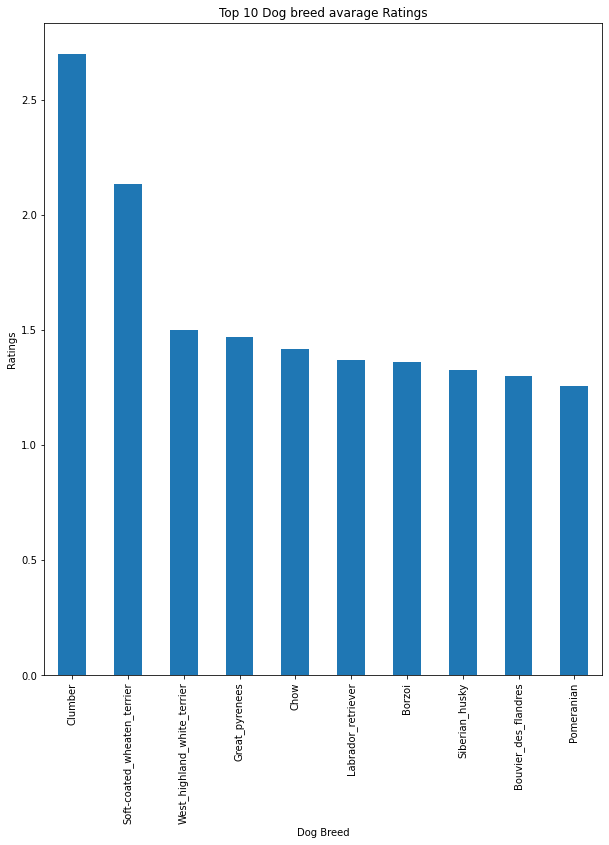

In [75]:
### Top 10 drop breed with the highest ratings

twitter_archive_master.groupby(['breed']).ratings.mean().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Dog breed avarage Ratings',
               ylabel='Ratings', xlabel='Dog Breed', figsize=(10,12))


In [76]:
twitter_archive_master.groupby(['breed']).ratings.mean().sort_values()

breed
Japanese_spaniel               0.500000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
Ibizan_hound                   0.925000
Tibetan_terrier                0.925000
                                 ...   
Chow                           1.416667
Great_pyrenees                 1.466667
West_highland_white_terrier    1.500000
Soft-coated_wheaten_terrier    2.135714
Clumber                        2.700000
Name: ratings, Length: 114, dtype: float64

<AxesSubplot:title={'center':'Top 10 Dog breed avarage likes'}, xlabel='Dog breed', ylabel='likes'>

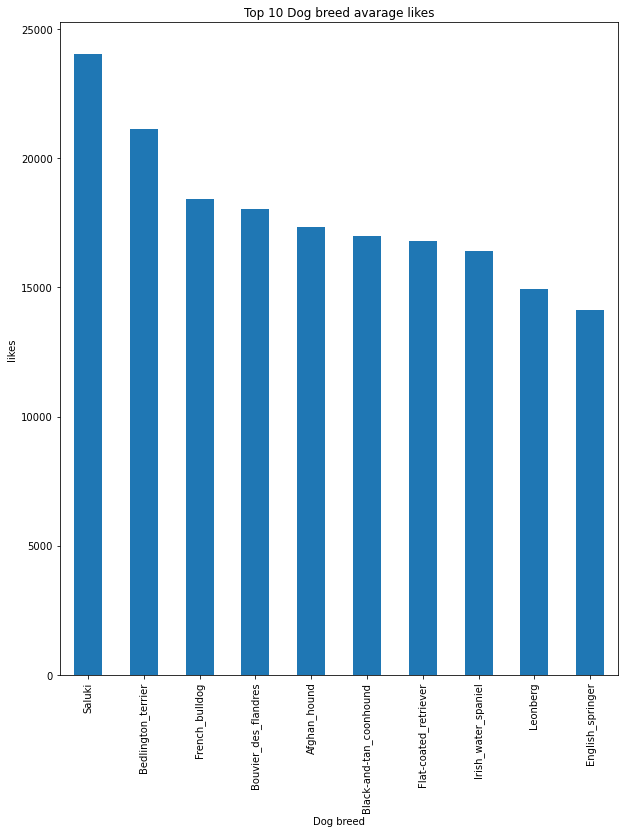

In [77]:
## Top 10 Dog breed with highest average Likes

twitter_archive_master.groupby(['breed']).favorite_count.mean().sort_values(ascending=False)[:10].plot(kind='bar', title='Top 10 Dog breed avarage likes',
               xlabel='Dog breed', ylabel='likes', figsize=(10,12))

In [78]:
twitter_archive_master.groupby(['breed']).favorite_count.mean().sort_values()

breed
Brabancon_griffon         885.000000
Groenendael              1156.500000
Japanese_spaniel         1362.000000
Irish_wolfhound          1534.000000
Tibetan_terrier          1841.000000
                            ...     
Afghan_hound            17326.666667
Bouvier_des_flandres    18032.000000
French_bulldog          18416.806452
Bedlington_terrier      21153.166667
Saluki                  24060.000000
Name: favorite_count, Length: 114, dtype: float64

In [79]:
## check for correlation between the number of retweet and likes, use the pandas corr() function.


twitter_archive_master["favorite_count"].corr(twitter_archive_master["retweet_count"])

0.9130257032677368

In [80]:
## check for correlation between the number of retweet and ratings, use the pandas corr() function.


twitter_archive_master["retweet_count"].corr(twitter_archive_master["ratings"])

0.04945495074387189

### Insights:
1.  Clumber has the highest average ratings (2.7) and Japanese_spaniel has the lowest rating (0.5)

2.  saluki has the highest average likes(24060) and Brabancon_griffon has the lowest likes (885)

3.  There is strong  positve correlation (0.91) between number of tweet likes and number of retweet, i.e the more the retweet the more of the likes.

4.  There is no significant correlation between retweet count and Dogs Ratings.
